In [65]:
import numpy as np
import util
from prev_problems_modules import p01b_logreg

WILDCARD = 'X'


def part_c(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # Part (c): Train and test on true labels
    # use true labels, and x1, x2, making sure to use t labels
    x_train_c, y_train_c = util.load_dataset(train_path, label_col='t', add_intercept=True)
    model_with_true_labels = p01b_logreg.LogisticRegression()
    model_with_true_labels.fit(x_train_c, y_train_c)
    # Make sure to save outputs to pred_path_c
    # plot the predictions 
    util.plot(x_train_c, y_train_c, model_with_true_labels.theta.T, save_path=pred_path + 'p02c.png')
    # output trained model's predictions on the test set 
    x_test_c, y_test_c = util.load_dataset(test_path, label_col='t', add_intercept=True)
    pred_labels_c = model_with_true_labels.predict(x_test_c)
    # plot it 
    util.plot(x_test_c, y_test_c, model_with_true_labels.theta.T, save_path=pred_path + 'p02cTest.png')

def part_d(train_path, valid_path, test_path, pred_path):
    # Part (d): Train on y-labels and test on true labels
    # retrain the classifier, but with y instead of t 
    x_train_d, y_train_d = util.load_dataset(train_path, label_col='y', add_intercept=True)
    model_with_y_only = p01b_logreg.LogisticRegression()
    model_with_y_only.fit(x_train_d, y_train_d)
    util.plot(x_train_d, y_train_d, model_with_y_only.theta.T, save_path=pred_path + 'p02d.png')
    # run it on the test set
    x_test_d, y_test_d = util.load_dataset(test_path, label_col = 'y', add_intercept=True)
    util.plot(x_test_d, y_test_d, model_with_y_only.theta.T, save_path='p02dTest.png')
    # Make sure to save outputs to pred_path_d

def part_e(train_path, valid_path, test_path, pred_path):
    # Part (e): Apply correction factor using validation set and test on true labels
    # apply correction factor, using the validation set, estimate the constant alpha, by averaging
    # you're classifier's prediction over all labeled datasets
    x_train_e, y_train_e = util.load_dataset(train_path, label_col='y', add_intercept=True)
    model_with_y_only = p01b_logreg.LogisticRegression()
    model_with_y_only.fit(x_train_e, y_train_e)
    x_test_e, y_test_e = util.load_dataset(test_path, label_col = 'y', add_intercept=True)
    
    x_valid_e, y_valid_e = util.load_dataset(valid_path, add_intercept=True)
    # we want to reduce the valid set to only those with y == 1 
    mask = np.where(y_valid_e == 1)
    x_valid_e_masked = x_valid_e[mask]
    # the equation is sum(h(x)) / num examples in V+
    validation_predictions = model_with_y_only.predict(x_valid_e_masked)
    print(validation_predictions)
    _, columns = validation_predictions.shape
    labeling_rate = (np.sum(validation_predictions)) / columns
    print("Labeling rate alpha ", labeling_rate)
    # take correction to plotting 
    print(f"With Correction of {labeling_rate}")
    util.plot(x_train_e, y_train_e, model_with_y_only.theta.T, correction=labeling_rate, save_path='p02eTrain.png')
    util.plot(x_test_e, y_test_e, model_with_y_only.theta.T, correction=labeling_rate, save_path='p02eTest.png')
    # Plot and use np.savetxt to save outputs to pred_path_e
    # *** END CODER HERE


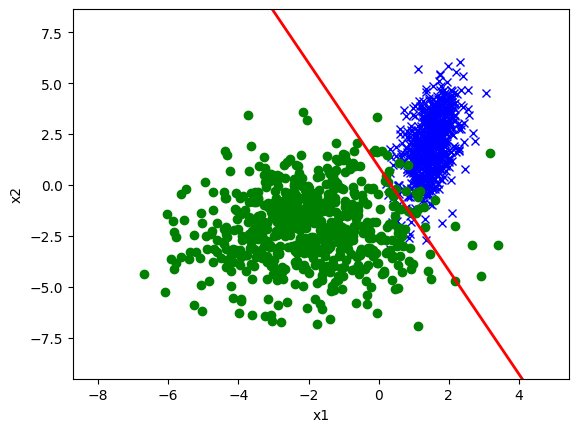

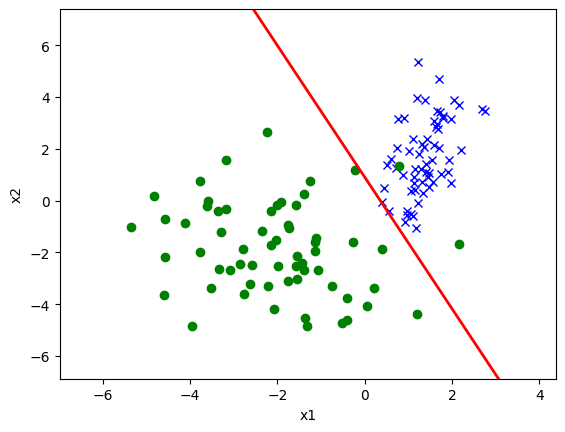

In [66]:
# use dataset 3 

ds3_train = '../data/ds3_train.csv'
ds3_valid = '../data/ds3_valid.csv'
ds3_test = '../data/ds3_test.csv'
save_path = '../save_runs/'

part_c(ds3_train, ds3_valid, ds3_test, save_path)


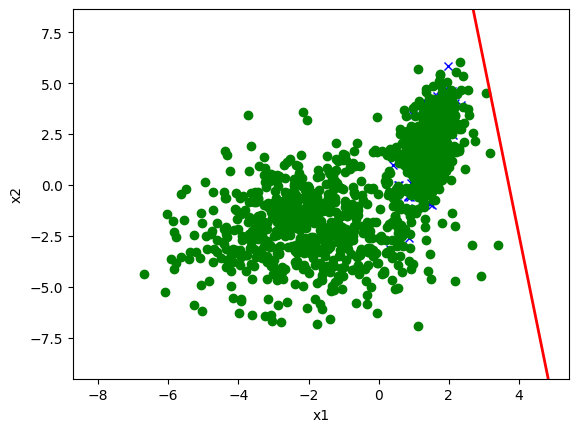

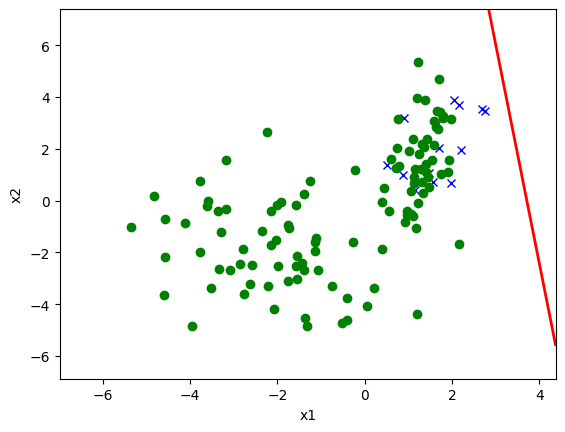

In [67]:
part_d(ds3_train, ds3_valid, ds3_test, save_path)

[[0.24130327 0.1240087  0.09731881 0.12808992 0.13074925 0.21365991
  0.17804415 0.2910147  0.19588649 0.16059545 0.2273719  0.07290069]]
Labeling rate alpha  0.17174527144749677
With Correction of 0.17174527144749677


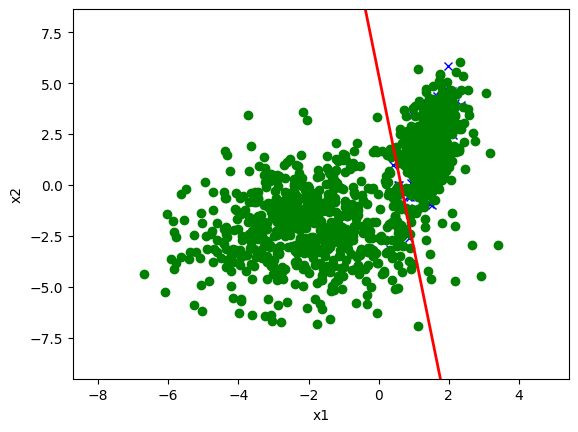

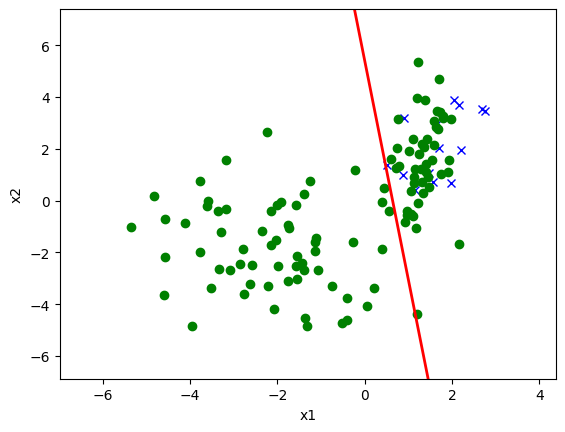

In [68]:
part_e(ds3_train, ds3_valid, ds3_test, save_path)
    